**Kate Groschner** <br>
**AY250** <br>
**Homework 4** <br>

## Part A: Definition of the simulation as a function 

In [28]:
#Original simulation code put into a callable function
from random import uniform
from math import sqrt
from time import time
import numpy as np

def pi_sim(number_of_darts):
    number_of_darts_in_circle = 0
    start_time = time()
    for n in range(number_of_darts):
        x,y = uniform(0,1), uniform(0,1)
        if sqrt((x-0.5)**2 + (y - 0.5)**2) <= 0.5:
            number_of_darts_in_circle += 1
    pi_approx = 4 * number_of_darts_in_circle / float(number_of_darts)
    end_time = time()
    execution_time = end_time - start_time
    sim_rate = number_of_darts/execution_time
    return number_of_darts, execution_time, sim_rate, pi_approx

## Part B: Defining a function to test serial implementation of simulation with different number of darts

In [73]:
def serial_test(number_of_darts,sampling):
#     while (number_of_darts-10)%sampling != 0:
#         sampling += 1
    darts = np.linspace(10,number_of_darts,sampling, dtype=int).tolist()
    execution_time = []
    sim_rate = []
    for numdarts in darts:
        d,t,s, _ = pi_sim(numdarts)
        execution_time.append(t)
        sim_rate.append(s)
    
    return darts,execution_time, sim_rate

In [76]:
a,b,c = serial_test(10000,100000)

KeyboardInterrupt: 

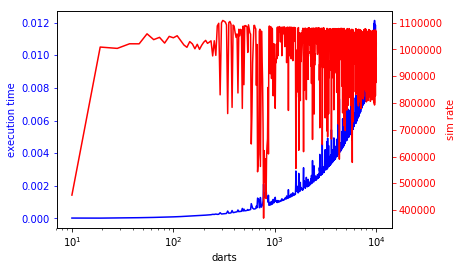

In [71]:
%matplotlib inline
from matplotlib import pyplot as plt

fig, ax1 = plt.subplots()
ax1.semilogx(a, b, 'b-')
ax1.set_xlabel('darts')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('execution time', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.semilogx(a, c, 'r')
ax2.set_ylabel('sim rate', color='r')
ax2.tick_params('y', colors='r')

## Part C: Defining a function to test concurrent.futures implementation of simulation with different number of darts

In [78]:
from concurrent.futures import ProcessPoolExecutor
e = ProcessPoolExecutor(2)

def cofut_test(number_of_darts,sampling):
#     while (number_of_darts-10)%sampling != 0:
#         sampling += 1
    darts = np.linspace(10,number_of_darts,sampling, dtype=int).tolist()
    execution_time = []
    sim_rate = []
    for numdarts in darts:
        future = e.submit(pi_sim,numdarts)
        _,t,s, _ = future.result()
        execution_time.append(t)
        sim_rate.append(s)

    return darts,execution_time, sim_rate

In [ ]:
e = ProcessPoolExecutor(2)
dc, dt, ds = cofut_test(1000000,500)

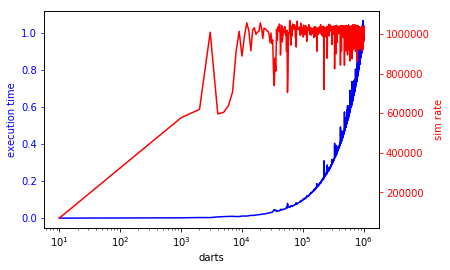

In [86]:
fig, ax1 = plt.subplots()
ax1.semilogx(dc, dt, 'b-')
ax1.set_xlabel('darts')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('execution time', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.semilogx(dc, ds, 'r')
ax2.set_ylabel('sim rate', color='r')
ax2.tick_params('y', colors='r')

In [ ]:
fig, ax1 = plt.subplots()
ax1.semilogx(dc, dt, 'b-')
ax1.set_xlabel('darts')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('execution time', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.semilogx(dc, ds, 'r')
ax2.set_ylabel('sim rate', color='r')
ax2.tick_params('y', colors='r') 